# Qosf Screening: Task 2

## Using phase-flip code for Quantum Error Correction.

### 1. Creating a Bell State:

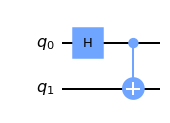

In [13]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
from math import sqrt, pi

qr = QuantumRegister(2, 'q')
qc = QuantumCircuit(qr)

qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.draw('mpl')

In [8]:
backend = Aer.get_backend('statevector_simulator')
Bell_state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
print(Bell_state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


This Bell state can be explained by the following logic:
$$\newcommand{\ket}[1]{\right\rangle}$$
  $$ |0\rangle = \begin{pmatrix} 1\\ 0 \end{pmatrix}$$
  
  $$ |H\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\ 1 & -1 \end{pmatrix}$$  
  
  The product of the Hadamard gate and the zero gate is given by:
  
  $$ H|0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\ 1 & -1 \end{pmatrix}\begin{pmatrix} 1\\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\ 1 \end{pmatrix}$$
  
  This state is also known as the superposition state given by:
  
  $$|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$
  This is known as the superposition state because both the states 0 and 1 exist simultaneously in a single state.
  Using the CNOT gate we entangle the two qubits thereby creating an entangled state. The two qubits are entangled using the tensor product. Let us call this product $|\psi\rangle$.
  
  $$|\psi\rangle = |(q_1)+\rangle = |q_1\rangle \otimes |+\rangle =\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \times \begin{pmatrix} 1\\ 1 \end{pmatrix}\\ 0 \times \begin{pmatrix} 1\\ 1 \end{pmatrix} \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\ 1\\ 0\\ 0 \end{pmatrix}$$
 The CNOT matrix is: $$CNOT = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix}$$
 
 The matrix product of CNOT and $|\psi\rangle$ is a new entangled state let us name it as $|\psi\rangle_L$
 
 $$|\psi\rangle_L = CNOT|\psi\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix} \begin{pmatrix} 1\\ 1\\ 0\\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\ 0\\ 0\\ 1 \end{pmatrix}$$
 
 This entangled state is equivalent to $|\psi\rangle_L = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$
 
 This result agrees exactly with the result we got from the circuit measurement.
 The reason we used the $|0\rangle$ gates as the basis gates because qubits in Qiskit simulator are by default set as the $|0\rangle$ gates. 
 
 
 ### 2. Adding the error gates
 
 I chose the phase-flip gate as the choice of my error gate, which is also known as the Z-gate denoted by the Pauli matrix: 
 
 $$\sigma_z = \begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}$$ 

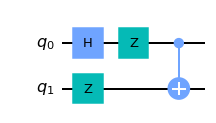

In [14]:
qr = QuantumRegister(2, 'q')
qc = QuantumCircuit(qr)

qc.h(qr[0])
qc.z(qr[0])
qc.z(qr[1])
qc.cx(qr[0], qr[1])
qc.draw('mpl')

In [15]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
print(final_state)

[ 0.70710678+0.j  0.        -0.j -0.        +0.j -0.70710678+0.j]


The errors can be found out by the following circuit:

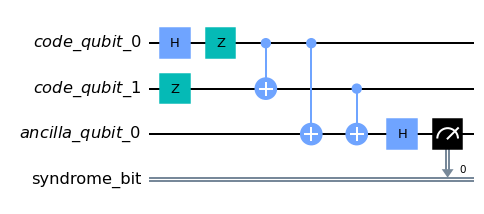

In [19]:
qr = QuantumRegister(2, 'code_qubit')
ar = QuantumRegister(1, 'ancilla_qubit')
cr = ClassicalRegister(1, 'syndrome_bit')
qc = QuantumCircuit(qr, ar, cr)

qc.h(qr[0])
qc.z(qr[0])
qc.z(qr[1])
qc.cx(qr[0], qr[1])

qc.cx(qr[0], ar[0])
qc.cx(qr[1], ar[0])
qc.h(ar[0])
qc.measure(ar[0], cr[0])
qc.draw('mpl')

In [20]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'0': 510, '1': 514}


The two ancilla qubits are always initalized in the $|0\rangle$ state. With the syndrome bit we extract one bit output from the states. This does not disturb the wavefunction as we use measurement on the ancilla bit to see if there is an error. For basis state in Z basis like $|00\rangle$ and $|11\rangle$ the measurement simply returns '0' as the output but if they are in $|01\rangle$ or $|10\rangle$ state then it returns 1 as the value depicting an error. So to find if there is an error I used a Hadamard gate to measure the state in the X basis. But this measurement tells us about the collective property of the error and not the specific qubit. That is determined by the calculation below.

Here we can see that the phase of the final term is changed due to the introduction of the error gate.

The Z error gate is a special gate. It changes the phase of the statevector but also causes a bit-flip in the X basis. Hence, we get two different types of errors in a single error gate operation.

Now to find that which qubit caused the error, the first qubit the calculation is as follows:

 $$\sigma_zH|0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0\\ 0 & -1\end{pmatrix} \begin{pmatrix} 1\\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\ -1 \end{pmatrix}$$
 
 This state is also known as the $|-\rangle$ state; $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$
 
 Interestingly, for the second qubit the $\sigma_z$ matrix has no effect on the $|0\rangle$,
 
 $$\sigma_z|0\rangle = \begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}\begin{pmatrix} 1\\ 0 \end{pmatrix} = \begin{pmatrix} 1\\ 0 \end{pmatrix}$$
 
 Now the entangled state of the two qubits changes to, $|\psi_1\rangle$
 
 $$|\psi_1\rangle = |(q_1)-\rangle = |q_1\rangle \otimes |-\rangle =\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \times \begin{pmatrix} 1\\ -1 \end{pmatrix}\\ 0 \times \begin{pmatrix} 1\\ -1 \end{pmatrix} \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\ -1\\ 0\\ 0 \end{pmatrix}$$
 
 Applying the CNOT gate we get:
 
 $$|\psi_1\rangle_L = CNOT|\psi_1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0 \end{pmatrix} \begin{pmatrix} 1\\ -1\\ 0\\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\ 0\\ 0\\ -1 \end{pmatrix}$$
 
 This result is in accordance with the circuit measurement after applying the error gate.
 
 ### 3. Applying the phase/sign-flip code
 
 Now that we have narrowed to down the location of the error (the $\sigma_z$ gate on the first qubit) we are ready to apply the phase-flip error code to that gate.

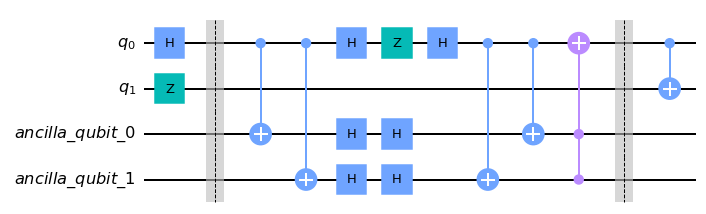

In [23]:
qr = QuantumRegister(2, 'q')
ar = QuantumRegister(2, 'ancilla_qubit')
qc = QuantumCircuit(qr, ar)

qc.h(qr[0])
qc.z(qr[1])

qc.barrier()

qc.cx(qr[0], ar[0])
qc.cx(qr[0], ar[1])

qc.h(qr[0])
qc.h(ar[0])
qc.h(ar[1])
qc.z(qr[0]) # To simulate phase flip error
qc.h(qr[0])
qc.h(ar[0])
qc.h(ar[1])

qc.cx(qr[0], ar[1])
qc.cx(qr[0], ar[0])

qc.ccx(ar[1], ar[0], qr[0])

qc.barrier()

qc.cx(qr[0], qr[1])

qc.draw('mpl')

The above circuit represents the phase-flip error correcting circuit. This circuit is used as an error correction circuit for the phase-flip error which will correct the bit-flip error in the X basis as well. 

### 4. Measurements:

We now measure the circuit errors with multiple shots using the IBMQ qasm simulator and also on the qiskit qasm simulator.

In [27]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram

qr = QuantumRegister(2, 'code_qubit')
ar = QuantumRegister(2, 'ancilla_qubit')
cr = ClassicalRegister(1, 'syndrome_bit')
qc = QuantumCircuit(qr, ar, cr)

qc.h(qr[0])
qc.z(qr[1])

qc.barrier()

qc.cx(qr[0], ar[0])
qc.cx(qr[0], ar[1])

qc.h(qr[0])
qc.h(ar[0])
qc.h(ar[1])
qc.z(qr[0]) # To simulate phase flip error
qc.h(qr[0])
qc.h(ar[0])
qc.h(ar[1])

qc.cx(qr[0], ar[1])
qc.cx(qr[0], ar[0])

qc.ccx(ar[1], ar[0], qr[0])

qc.barrier()

qc.cx(qr[0], qr[1])

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

job = execute(qc, backend, shots = 1024)

counts = job.result().get_counts()

print("\n Phase flip code with error ")
print("----------------------")
print(counts)

ibmqfactory.load_account:WARNING:2021-02-11 21:58:11,387: Credentials are already in use. The existing account in the session will be replaced.



 Phase flip code with error 
----------------------
{'0': 1024}


In [28]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'0': 1024}


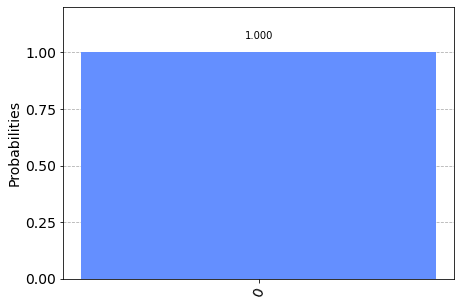

In [29]:
plot_histogram(counts)

Thus as expected the phase-flip error correction circuit has resulted in resolving both the errors of phase-flip and bit-flip in Z and X basis respectively. 

### References:

1) Michael A. Nielsen and Isaac L. Chuang (2010). *Quantum Computation and Quantum Information*.

2) *Qiskit Textbook* https://qiskit.org/textbook/ch-quantum-hardware/error-correction-repetition-code.html

3) J Roffe. *Quantum Error Correction: An introductory Guide* https://arxiv.org/abs/1907.11157